# Funciones Acumulativas

Las funciones acumulativas nos permiten trabajar en la fila "n" de una tabla con todos los datos de las filas "0 a n"
<br>Dentro de este tipo de funciones encontramos:

* cummax()  El máximo acumulado (ideal para máximo histórico por fecha)
* cummin()  El mínimo acumulado (ideal para mínimo histórico por fecha)
* cumsum() La suma acumulada (ideal para armado se subtotales por fecha)
* cumprod() El producto acumulado (ideal para rendimiento compuesto)

## Cummax()

El uso típico que le vamos a dar a esta función es para saber el máximo histórico de una serie en cada punto de la misma

In [1]:
import pandas as pd
data = pd.read_excel('excels_csvs/AAPL.xlsx')
data = data.sort_values(by='timestamp',ascending=True)
data = data.drop(["high","low","volume"], axis=1).set_index("timestamp")

data['maxHist'] = data.adjusted_close.cummax()
data.head(6)

,open,close,adjusted_close,maxHist
timestamp,,,,
2000-03-06,126.00,125.69,3.8960,3.8960
2000-03-07,126.44,122.87,3.8086,3.8960
2000-03-08,122.87,122.00,3.7816,3.8960
2000-03-09,120.87,122.25,3.7894,3.8960
2000-03-10,121.69,125.75,3.8979,3.8979
2000-03-13,122.12,121.31,3.7602,3.8979


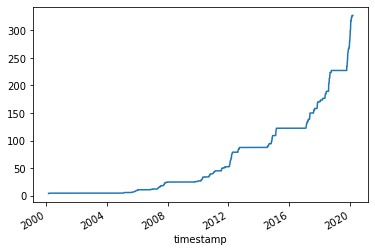

In [2]:
data.maxHist.plot()

## Cummin()

Obviamente es lo mismo que el cummax pero para mínimos, la combinación de cummax() y cummin() va a ser muy util para backtestings de drawdowns y recuperaciones posteriores

In [3]:
data = pd.read_excel('excels_csvs/AAPL.xlsx')
data = data.sort_values(by='timestamp',ascending=True)
data = data.drop(["high","low","volume"], axis=1).set_index("timestamp")

data['minHist'] = data.adjusted_close.cummin()
data.head(6)

,open,close,adjusted_close,minHist
timestamp,,,,
2000-03-06,126.00,125.69,3.8960,3.8960
2000-03-07,126.44,122.87,3.8086,3.8086
2000-03-08,122.87,122.00,3.7816,3.7816
2000-03-09,120.87,122.25,3.7894,3.7816
2000-03-10,121.69,125.75,3.8979,3.7816
2000-03-13,122.12,121.31,3.7602,3.7602


## Cumsum()

Cumsum() es obviamente una funcion de sumas acumuladas, que en la posicion de la fila "n" nos devuelve la suma de "0 a n" (inclusive)

$$ \large cumsum\hspace{3mm}(X_{n})\hspace{3mm}  =  \hspace{3mm} \sum_{i=0}^{n}x_{i} $$

En el ejemplo aprovechamos para borrar las columnas de OHLC par limpiar un poco la salida con la función drop()

In [4]:
data = pd.read_excel('excels_csvs/AAPL.xlsx')
data = data.sort_values(by='timestamp',ascending=True)

data['volumenAcum'] = data.volume.cumsum()/1000000
data = data.drop(['open','high','low','close'],1).dropna().round(2)
data.set_index('timestamp',inplace=True)
data.head(6)

,adjusted_close,volume,volumenAcum
timestamp,,,
2000-03-06,3.90,1880000,1.88
2000-03-07,3.81,2437600,4.32
2000-03-08,3.78,2421700,6.74
2000-03-09,3.79,2470700,9.21
2000-03-10,3.90,2219700,11.43
2000-03-13,3.76,2713900,14.14


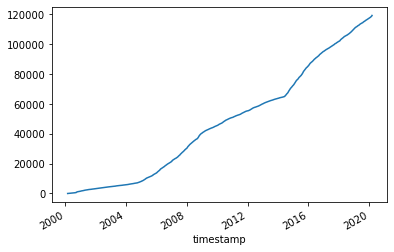

In [5]:
data.volumenAcum.plot()

## Cumprod()

In [6]:
v = [0.02, 0.05, -0.04]
v = np.array(v)
f = v + 1


ci =  100
c1 = ci * f[0]

c2 = c1 * f[1]

c3 = c2 * f[2]
c3

102.816

In [7]:
v = [0.02, 0.05, -0.04]
v = np.array(v)
f = v + 1


ci =  100
c1 = ci * f[0]

c2 = ci * f[0] * f[1]

c3 = ci * f[0] * f[1] * f[2]
c3

102.816

Cumprod() es una función de productorio, es decir el producto acumulado de 0 a n, para la fila n 

$$ \large cumprod\hspace{3mm}(X_{n})\hspace{3mm}  =  \hspace{3mm} \prod_{i=0}^{n}x_{i} $$

Vamos a usar esta fórmula para calcular rendimiento compuesto, es muy sencillo:
<br>  1- Creamos una columna "variacion" con el valor "r", rendimiento porcentual diario.
<br>  2- Creamos una columna "factor" con el valor (1+r)
<br>  2- Luego vamos a aplicar el productorio para cada fila de esa columna "factor" y le restamos 1 al resultado.

In [8]:
data = pd.read_excel('excels_csvs/AAPL.xlsx')
data = data.sort_values(by='timestamp',ascending=True)

data['variacion'] = data['adjusted_close'].pct_change()
data['factor'] = 1 + data['variacion'] 
data['rendimientoAcum'] = (data.factor.cumprod()-1)*100

data = data.drop(['open','high','low','close','volume'],1).dropna().round(4).set_index("timestamp")
data

,adjusted_close,variacion,factor,rendimientoAcum
timestamp,,,,
2000-03-07,3.8086,-0.0224,0.9776,-2.2433
2000-03-08,3.7816,-0.0071,0.9929,-2.9363
2000-03-09,3.7894,0.0021,1.0021,-2.7361
2000-03-10,3.8979,0.0286,1.0286,0.0488
2000-03-13,3.7602,-0.0353,0.9647,-3.4856
...,...,...,...,...
2020-03-02,298.8100,0.0931,1.0931,7569.6612
2020-03-03,289.3200,-0.0318,0.9682,7326.0780
2020-03-04,302.7400,0.0464,1.0464,7670.5339


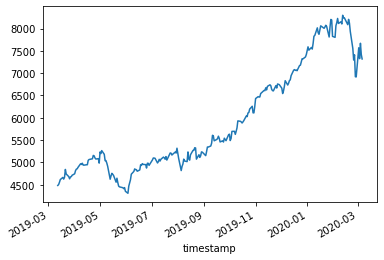

In [9]:
dataf = data.iloc[-250:]
dataf.rendimientoAcum.plot()

## Rolling vs Acumulativas (diferencias)
* cummax vs rolling(n).max()
* cummin vs rolling(n).min()
* cumsum vs rolling(n).sum()



# Agrupamiento

In [10]:
import pandas as pd

data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp")
data

,open,high,low,close,adjusted_close,volume
timestamp,,,,,,
2000-03-06,140.8125,141.3437,138.7500,139.7500,96.0516,11967100
2000-03-07,140.0000,140.1562,135.2187,137.0468,94.1937,20062000
2000-03-08,136.4687,137.8437,135.0312,136.8750,94.0756,11808500
2000-03-09,137.2500,140.8750,136.1250,140.8750,96.8248,5500900
2000-03-10,140.1875,142.0000,139.5312,140.1250,96.3093,7924600
...,...,...,...,...,...,...
2020-04-03,250.7600,253.3200,245.2200,248.1900,248.1900,134538553
2020-04-06,257.8400,267.0000,248.1698,264.8600,264.8600,186692564
2020-04-07,274.2100,275.0300,264.8900,265.1300,265.1300,199187791


## Agrupamiento por columnas o toda la tabla

In [11]:
data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp")
data['variacion'] = data.adjusted_close.pct_change()

pd.options.display.max_rows = 10

agrupados = data.volume.groupby(data.index.dayofweek).sum()


agrupados

timestamp
0     95157771129
1    115682363236
2    120629310698
3    121977842455
4    120574665088
Name: volume, dtype: int64

In [12]:
data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp", drop=False)
data['variacion'] = data.adjusted_close.pct_change()
agrupados = data.adjusted_close.groupby(data.index.to_period('Q')).last()

agrupados

timestamp
2000Q1    103.6151
2000Q2    100.3432
2000Q3     99.4543
2000Q4     91.1271
2001Q1     81.2860
            ...   
2019Q2    290.2265
2019Q3    295.3244
2019Q4    321.8600
2020Q1    257.7500
2020Q2    278.2000
Freq: Q-DEC, Name: adjusted_close, Length: 82, dtype: float64

## Métodos para concatenar a los agrupamientos

Así como usamos la funcón count() podemos usar otro tipo de funciones, por ejemplo:
* first()
* last()
* min()
* max()
* sum()
* prod()
* mean()
* median()
* std() desvio estandar (sigma)
* var() varianza (sigma^2)
* skew()  (Coeficiente de asimetria)
* kurtosis() 
* quantile()  

## Criterios de agrupamiento del tipo fechas

# Mas funciones

## Clip (Acotado)
Esta función "acota" los valores de una columna entre un mínimo y un máximo, es muy útil para descartar la incidencia de "outliers" o "datos aberrantes" o "valores de colas" o simplemente "errores" del data feed

In [13]:
tabla = pd.read_excel('excels_csvs/AAPL_SPY_QQQ.xlsx')
tabla.set_index("timestamp",inplace=True)
tabla.tail(8)

,AAPL,SPY,QQQ
timestamp,,,
2020-02-26,1.586365,-0.367823,0.515392
2020-02-27,-6.536819,-4.491172,-5.007391
2020-02-28,-0.058497,-0.420154,0.077806
2020-03-02,9.310067,4.330656,5.160350
2020-03-03,-3.175931,-2.863244,-3.206728
2020-03-04,4.638463,4.203304,4.172236
2020-03-05,-3.243707,-3.324171,-3.038218
2020-03-06,-1.328008,-1.653111,-1.687225


Supongamos que no queremos considerar los valores superiores a +8% o los inferiores a -8% y queremos "topearlos" en esos límites

In [14]:
tabla = pd.read_excel('excels_csvs/AAPL_SPY_QQQ.xlsx')    
tabla.set_index("timestamp",inplace=True)
tabla_acotada = tabla.clip(-6,8)
tabla_acotada.tail(8)

,AAPL,SPY,QQQ
timestamp,,,
2020-02-26,1.586365,-0.367823,0.515392
2020-02-27,-6.000000,-4.491172,-5.007391
2020-02-28,-0.058497,-0.420154,0.077806
2020-03-02,8.000000,4.330656,5.160350
2020-03-03,-3.175931,-2.863244,-3.206728
2020-03-04,4.638463,4.203304,4.172236
2020-03-05,-3.243707,-3.324171,-3.038218
2020-03-06,-1.328008,-1.653111,-1.687225


como vemos en el dato del 2 de marzo de 2020, que teníamos un 9.31, lo cambió por 8 que era nuestro "tope"

## Funciones Estadísticas Báscias
Gracias a pandas tenemos a disposición de un clic las siguientes funcones estadísticas básicas:
* Valor máximo: max()
* Valor mínimo: min()
* Indice de valores mínimos y máximos: idxmin() e idxmax()
* Media: mean()
* Mediana: madian()
* Producto: prod()  o product()
* Suma: sum()
* Ranking: rank()
* Quantiles: quantile()
* Cantidad de valores únicos: nunique()

Tambien podemos agrupar por otro tipo de datos:
* Cualquier columna discreta (supongamos que tengamos una con True/False)
* Tambíen se puede discretizar un rango continuo pero ya veremos ottras herramientas mas interesantes para eso
* Cualquier otro agrupamiento de fechas:
    * year
    * month
    * week
    * dayofweek
    * mas de un criterio
    * Trimestral: usando to_period('Q') 

In [15]:
tabla['AAPL-ranks'] = tabla.AAPL.rank()
tabla['AAPL-rank_p'] = tabla.AAPL.rank(pct=True)
tabla

,AAPL,SPY,QQQ,AAPL-ranks,AAPL-rank_p
timestamp,,,,,
2000-03-07,-2.243326,-1.934273,-1.518552,602.0,0.119634
2000-03-08,-0.708922,-0.125380,0.907052,1522.0,0.302464
2000-03-09,0.206262,2.922331,3.370767,2674.0,0.531399
2000-03-10,2.863250,-0.532405,-0.434793,4560.0,0.906200
2000-03-13,-3.532671,-1.092729,-2.620053,276.0,0.054849
...,...,...,...,...,...
2020-03-02,9.310067,4.330656,5.160350,5011.0,0.995827
2020-03-03,-3.175931,-2.863244,-3.206728,322.0,0.063990
2020-03-04,4.638463,4.203304,4.172236,4858.0,0.965421


In [16]:
tabla.AAPL.quantile(0.01)

-6.327301325275796

In [17]:
tabla.AAPL.quantile(0.995827)

9.31011051842701

In [3]:
import yfinance as yf
data = yf.download('AAPL')
data['variacion']  = data['Adj Close'].pct_change() * 100
data

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume,variacion
Date,,,,,,,
1980-12-12,0.51,0.52,0.51,0.51,0.40,117258400,NaN
1980-12-15,0.49,0.49,0.49,0.49,0.38,43971200,-5.000000
1980-12-16,0.45,0.45,0.45,0.45,0.36,26432000,-5.263158
1980-12-17,0.46,0.46,0.46,0.46,0.36,21610400,0.000000
1980-12-18,0.48,0.48,0.48,0.48,0.38,18362400,5.555556
...,...,...,...,...,...,...,...
2020-08-24,514.79,515.14,495.75,503.43,503.43,86484400,1.196028
2020-08-25,498.79,500.72,492.21,499.30,499.30,52873900,-0.820372
2020-08-26,504.72,507.97,500.33,506.09,506.09,40755600,1.359904


In [19]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,variacion
count,10013.000000,10013.000000,10013.000000,10013.000000,10013.000000,1.001300e+04,10012.000000
mean,35.956477,36.331976,35.588659,35.977813,33.814412,8.533624e+07,0.114354
std,67.028019,67.758571,66.373329,67.123660,65.502703,8.567064e+07,2.910446
min,0.200000,0.200000,0.200000,0.200000,0.150000,3.472000e+05,-51.818182
25%,1.080000,1.100000,1.060000,1.080000,0.920000,3.288320e+07,-1.315789
50%,1.750000,1.780000,1.720000,1.750000,1.480000,5.716200e+07,0.000000
75%,39.670000,40.410000,39.290000,39.810000,34.400000,1.062530e+08,1.530856
max,514.790000,515.140000,500.330000,506.090000,506.090000,1.855410e+09,32.786885


In [20]:
data.skew()

Open         2.585876
High         2.595338
Low          2.579704
Close        2.591513
Adj Close    2.757499
Volume       3.503038
variacion   -0.395246
dtype: float64

# Repaso de Estadística

## Desvío Estandrar - Fórmulas

El desvio es el sigma, la varianza es el sigma cuadrado

$$ \large \sigma^2 = \sum_{x=i}^{n} \frac{1}{n} . (X_i - \bar{X} )^2  $$

In [21]:
tabla.std()

AAPL              2.509999
SPY               1.193366
QQQ               1.694009
AAPL-ranks     1452.757469
AAPL-rank_p       0.288704
dtype: float64

## Error estandar - Fórmulas

$$ \Large \frac{\sigma}{\sqrt{n}}$$ 

In [22]:
tabla.sem()

AAPL            0.035384
SPY             0.016823
QQQ             0.023881
AAPL-ranks     20.479663
AAPL-rank_p     0.004070
dtype: float64

## Varianza

In [23]:
tabla.var()

AAPL           6.300093e+00
SPY            1.424123e+00
QQQ            2.869668e+00
AAPL-ranks     2.110504e+06
AAPL-rank_p    8.334988e-02
dtype: float64

## Skew - Fórmulas

$$ \large  skew =  \frac{\mu_3}{\sigma^3}  =  \frac{\sum_{x=i}^{n} \frac{1}{n} . (X_i - \bar{X} )^3}{\sigma^3} $$

## Repaso de Coeficiente de Asimetría

<img src='imagenes/skew.png' style='width:600px;float:left;'>

## Repaso de quantiles, cuartiles, quintiles, deciles, percentiles y blabla_iles

<img src='imagenes/quantiles.png' style='width:600px;float:left;'>

In [24]:
data.variacion.quantile(0.5)

0.0

In [25]:
data.variacion.rank(pct=True)

Date
1980-12-12         NaN
1980-12-15    0.033260
1980-12-16    0.029215
1980-12-17    0.486117
1980-12-18    0.968338
                ...   
2020-08-24    0.711446
2020-08-25    0.315421
2020-08-26    0.731123
2020-08-27    0.262185
2020-08-28    0.421294
Name: variacion, Length: 10013, dtype: float64

In [26]:
data.variacion.quantile(0.048853)

-4.309720216907658

In [27]:
data.variacion['2000-03-07']

-2.319587628865971

## Kurtosis

$$ \Large kurtosis = \frac{\sum_{i=1} (X_i-\bar{X})^4}{n . \sigma^4}$$


Coeficiente de apuntamiento

<div style="width:600px;float:left;">
    <br>La Curtosis nos da una idea de la forma, mientras mas alta, mas valores cerca de la media y mas gruesas las colas
    <ul>
        <li> Leptocúrtica,  Curtosis > 3 (más apuntada y con colas más gruesas que la normal) </li>
        <li> Platicúrtica,  Curtosis < 3 (menos apuntada y con colas menos gruesas que la norma) </li>
        <li> Mesocúrtica,   Curtosis = 3 (tiene una distribución normal) </li>
    </ul>
</div>
<div style="width:350px;float:right;margin-top:-25px;">
    <img src="imagenes/kurtosis.png" style="width:300px;height:230px;">
</div>


In [8]:
data_pos = data.loc[data.variacion>=0]
data_neg = data.loc[data.variacion<0]


In [9]:
data.variacion.kurtosis()

16.847533122755742

In [10]:
data_pos.variacion.kurtosis()

16.788294684813707

In [11]:
data_neg.variacion.kurtosis()

80.06387772407538

In [29]:
data.variacion.skew()

-0.395246442188929

In [30]:
data.variacion.std()

2.9104461487235884

## Covarianza

$$ \large s_{xy}={1 \over n}\sum _{i=1}^{n}{(x_{i}-{\overline {x}})(y_{i}-{\overline {y}})} $$

In [17]:
import yfinance as yf

activos = ['GGAL','YPF','PAM','EDN','BBAR']
data = yf.download(activos, start='2001-01-01', end='2020-08-30')['Adj Close']
tabla = data.pct_change().dropna()*100
tabla

[*********************100%***********************]  5 of 5 downloaded


,BBAR,EDN,GGAL,PAM,YPF
Date,,,,,
2009-10-12,4.815769,5.421687,1.574803,1.199041,-0.654236
2009-10-13,-1.112967,1.714286,0.387597,-2.053712,1.448798
2009-10-14,-1.408290,0.000000,2.702703,-0.483871,0.292113
2009-10-15,-0.858584,-1.460674,-2.819549,-0.648298,1.100324
2009-10-16,-3.312621,1.368301,-1.547389,0.407830,-0.288092
...,...,...,...,...,...
2020-08-24,-0.903614,-5.660377,-0.494560,0.363967,0.934579
2020-08-25,1.823708,-2.857143,1.093439,1.450589,2.777778
2020-08-26,-3.283582,1.470588,-1.278269,2.234138,0.180180


### Covarianza contra si mismo

In [32]:
tabla.var()

BBAR    12.707486
EDN     16.074975
GGAL    12.458257
PAM      9.922616
YPF      9.329876
dtype: float64

In [33]:
tabla.GGAL.cov(tabla.GGAL)

12.458256984791054

In [18]:
tabla.GGAL.cov(tabla.EDN)

7.623239220769632

In [24]:
tabla.GGAL.corr(tabla.EDN, method='spearman')

0.4422269644512026

### Matriz de covarianzas

In [35]:
tabla.cov()

,BBAR,EDN,GGAL,PAM,YPF
BBAR,12.707486,7.703777,10.331156,7.334663,5.794809
EDN,7.703777,16.074975,7.621929,7.552502,5.037113
GGAL,10.331156,7.621929,12.458257,7.340164,6.039571
PAM,7.334663,7.552502,7.340164,9.922616,4.704856
YPF,5.794809,5.037113,6.039571,4.704856,9.329876


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Método apply en lugar de concatenar métodos

In [15]:
data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp", drop=False)
data['variacion'] = data.adjusted_close.pct_change()

data.variacion.groupby(data.index.year).apply(pd.DataFrame.kurtosis)

timestamp
2000    1.193932
2001    1.111118
2002    0.765087
2003    0.686158
2004   -0.089866
2005   -0.017349
2006    1.131858
2007    1.784550
2008    6.199943
2009    2.097440
2010    2.087319
2011    2.622736
2012    0.832749
2013    1.470514
2014    1.447480
2015    2.119530
2016    2.399044
2017    2.747828
2018    3.325541
2019    3.232906
2020    2.050529
Name: variacion, dtype: float64

In [26]:
data = pd.read_excel('excels_csvs/SPY.xlsx')
data = data.sort_values('timestamp',ascending=True).set_index("timestamp", drop=False)
data['variacion'] = data.adjusted_close.pct_change()

data.variacion.groupby(data.index.year).std()

timestamp
2000    0.014596
2001    0.013972
2002    0.016666
2003    0.010421
2004    0.007015
2005    0.006490
2006    0.006274
2007    0.009982
2008    0.025941
2009    0.016773
2010    0.011294
2011    0.014499
2012    0.008023
2013    0.006976
2014    0.007084
2015    0.009739
2016    0.008232
2017    0.004248
2018    0.010731
2019    0.007879
2020    0.034886
Name: variacion, dtype: float64

# Ejemplos de concatenado con groupby

In [27]:
data.variacion.groupby(data.index.year).quantile(0.75)

timestamp
2000    0.007558
2001    0.008178
2002    0.008673
2003    0.007152
2004    0.004949
2005    0.004225
2006    0.003931
2007    0.005909
2008    0.008237
2009    0.009289
2010    0.005898
2011    0.007545
2012    0.004744
2013    0.005414
2014    0.004816
2015    0.005468
2016    0.004508
2017    0.002579
2018    0.005482
2019    0.005872
2020    0.008318
Name: variacion, dtype: float64

In [28]:
data.variacion.groupby(data.index.year).describe()

,count,mean,std,min,25%,50%,75%,max
timestamp,,,,,,,,
2000,208.0,-0.000147,0.014596,-0.057192,-0.009229,-0.000447,0.007558,0.046713
2001,248.0,-0.000407,0.013972,-0.052679,-0.008637,0.000000,0.008178,0.048136
2002,252.0,-0.000827,0.016666,-0.038136,-0.010989,-0.001547,0.008673,0.059662
2003,252.0,0.001040,0.010421,-0.033233,-0.005080,0.001320,0.007152,0.034542
2004,252.0,0.000428,0.007015,-0.018452,-0.003504,0.000830,0.004949,0.016912
2005,252.0,0.000208,0.006490,-0.017616,-0.003708,0.000840,0.004225,0.019332
2006,251.0,0.000608,0.006274,-0.019024,-0.002714,0.000835,0.003931,0.020200
2007,251.0,0.000247,0.009982,-0.039057,-0.003517,0.000406,0.005909,0.031985
2008,253.0,-0.001479,0.025941,-0.096645,-0.012609,-0.000239,0.008237,0.139608


[*********************100%***********************]  1 of 1 downloaded


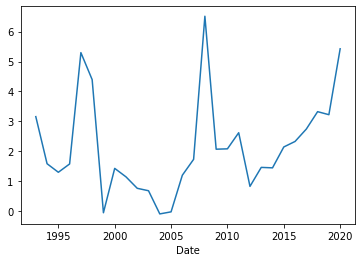

In [29]:
data = yf.download('SPY')
data['variacion'] = data['Adj Close'].pct_change()

data.variacion.groupby(data.index.year).apply(pd.DataFrame.kurtosis).plot()

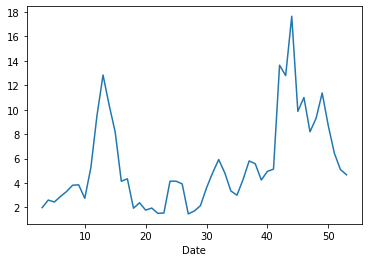

In [41]:
data.variacion.groupby(data.index.week).apply(pd.DataFrame.kurtosis).rolling(3).mean().plot()

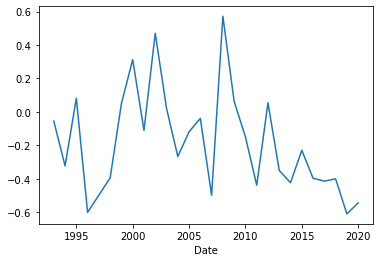

In [30]:
data.variacion.groupby(data.index.year).apply(pd.DataFrame.skew).plot()

[*********************100%***********************]  1 of 1 downloaded


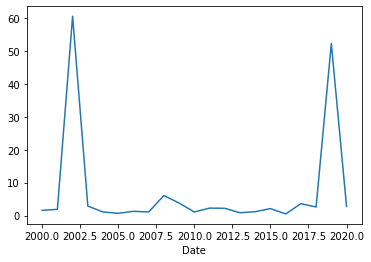

In [31]:
data = yf.download('GGAL', start='1990-01-01')
data['variacion'] = data['Adj Close'].pct_change()
data.variacion.groupby(data.index.year).apply(pd.DataFrame.kurtosis).plot()

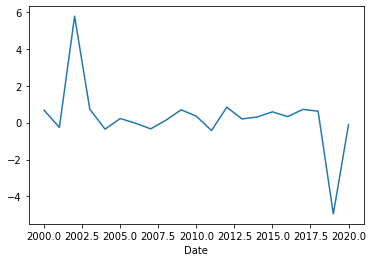

In [44]:
data.variacion.groupby(data.index.year).apply(pd.DataFrame.skew).plot()

## Agrupamiento de booleanos y discretos (Atencion a esto)

De paso vemos el WHERE() en un dataFrame

In [32]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index("timestamp").sort_index()

data['intradiario']  = data.close - data.open
data['cierre_previo']=data['close'].shift()
data['gap_positivo']=data.eval('open>cierre_previo')

# Lo defino por default arbitrariamente
data['vela_color'] = 'Verde'  

# Ahora si pregunto, si se da la condicion dejo el default si no la cambio:
data['vela_color']= data.vela_color.where(data.close > data.open,"Roja")

data

,open,high,low,close,adjusted_close,volume,intradiario,cierre_previo,gap_positivo,vela_color
timestamp,,,,,,,,,,
2000-03-06,126.00,129.13,125.00,125.69,3.8960,1880000,-0.31,NaN,False,Roja
2000-03-07,126.44,127.44,121.12,122.87,3.8086,2437600,-3.57,125.69,True,Roja
2000-03-08,122.87,123.94,118.56,122.00,3.7816,2421700,-0.87,122.87,False,Roja
2000-03-09,120.87,125.00,118.25,122.25,3.7894,2470700,1.38,122.00,False,Verde
2000-03-10,121.69,127.94,121.00,125.75,3.8979,2219700,4.06,122.25,False,Verde
...,...,...,...,...,...,...,...,...,...,...
2020-03-02,282.28,301.44,277.72,298.81,298.8100,85349339,16.53,273.36,True,Verde
2020-03-03,303.67,304.00,285.80,289.32,289.3200,79868852,-14.35,298.81,True,Roja
2020-03-04,296.44,303.40,293.13,302.74,302.7400,54794568,6.30,289.32,True,Verde


## Agrupando por SIZE o COUNT: Diferencia

* En los booleanos, ambos, size y count hacen referencia a la columna del agrupado
* En los discretos, el size hace referencia a la columna y el count a toda la matriz

In [35]:
data.groupby('gap_positivo').mean().volume

gap_positivo
False    2.323320e+07
True     2.405715e+07
Name: volume, dtype: float64

In [36]:
data.groupby('gap_positivo').intradiario.count()

gap_positivo
False    2217
True     2816
Name: intradiario, dtype: int64

In [37]:
data.groupby('gap_positivo').size()

gap_positivo
False    2217
True     2816
dtype: int64

In [46]:
data.groupby('gap_positivo').count()

,open,high,low,close,adjusted_close,volume,intradiario,cierre_previo,vela_color
gap_positivo,,,,,,,,,
False,2217,2217,2217,2217,2217,2217,2217,2216,2217
True,2816,2816,2816,2816,2816,2816,2816,2816,2816


In [47]:
data.groupby('gap_positivo').size().reset_index(name='total')

,gap_positivo,total
0,False,2217
1,True,2816


In [40]:
data.groupby('vela_color').size()

vela_color
Roja     2482
Verde    2551
dtype: int64

In [50]:
data.groupby('vela_color').count()

,open,high,low,close,adjusted_close,volume,intradiario,cierre_previo,gap_positivo
vela_color,,,,,,,,,
Roja,2482,2482,2482,2482,2482,2482,2482,2481,2482
Verde,2551,2551,2551,2551,2551,2551,2551,2551,2551


In [52]:
df = data.groupby(['gap_positivo','vela_color']).size().reset_index(name='dato')
df

,gap_positivo,vela_color,dato
0,False,Roja,1063
1,False,Verde,1154
2,True,Roja,1419
3,True,Verde,1397


In [ ]:
df.iloc[1]

* Varianza/Desvio
    * volatilidad anual < 20% =>  balancear portafolio arriesgado



* Skew
    * skew= 0
    * skew < 0  (o mas alzas que bajas o alzas muy pronunciadas) acento en el stop loss
    * skew > 0 (o mas bajas que alzas o bajas muy pronunciadas)  acento en el take profit



* Kurtosis
     * < 3   =>   Pocos valores cerca del centro y colas livianas  => lanzar... 
     * 3 =   =>   Distribucion normal
     * mayor que 3   =>   Muchos valores cerca del centro, y colas pesadas   =>  
     * mayor que 15  =>   Valores demasiado extremos  => filtrar... straddle.. coberturas 

    Ojo que hablo de kurtosis en opciones porque no esta en el pricing
    

# Combinacion de Agrupamiento + Filtros + Ordenamientos

## Agrupamiento con filtros

In [56]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp').sort_index()

# Calculo las variaciones
data['variaciones'] = data['adjusted_close'].pct_change()*100

# Filtramos las variaciones > 10%
filtro = data.loc[ data['variaciones'] > 10 ]  


# Contabilizamos por año ese filtro
agrupados = filtro.variaciones.groupby(filtro.index.year).count().to_frame()
agrupados.columns = ['Subas +10%']
agrupados

,Subas +10%
timestamp,
2000,2
2001,5
2003,1
2004,3
2006,1
2007,1
2008,2


## ¿Y al reves? primero agrupamiento y luego filtro? ¿cuando usar cada variante?

Ejemplo: Ver semanas con rendimiento mayor al 13% (ponele)

In [57]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp').sort_index()
data['factor']=data.adjusted_close.pct_change()+1

yields = pd.DataFrame()
yields['Yield'] = (data.factor.groupby([data.index.year, data.index.week]).prod() -1)*100
filtro = yields.loc[yields.Yield >13]
filtro

Yield
timestamp timestamp           
2000      25         13.369419
          34         13.620673
          44         19.885277
2001      3          13.437177
          12         17.232591
...                        ...
2004      42         16.485649
          48         17.001930
2006      29         19.834461
2011      41         14.115566
2018      18         13.251593

[11 rows x 1 columns]

## ¿Y Combinar agrupamiento y ordenamiento? ¿para que sirve esta combinación?

In [54]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp').sort_index()
data['factor']=data.adjusted_close.pct_change()+1

yields = pd.DataFrame()
yields['Yield'] = (data.factor.groupby([data.index.year, data.index.month]).prod() -1)*100

ordenado = yields.sort_values("Yield", ascending=False)
ordenado.index.names = ['Año','Semana']
ordenado.head(10)

Yield
Año  Semana           
2001 1       45.289973
2004 10      35.224576
     11      27.957519
2003 5       26.225045
2000 6       24.714829
2007 10      23.770259
     5       21.433651
2001 11      21.302590
2008 4       21.219291
2001 3       20.929821

# Resampleo

Mediante el metodo resample podemos reagrupar rapidamente en funcion de diferentes timeframes una serie dada
<br><b>Es importante aclarar que para que funcione el resampleo el indice de la tabla debe ser el timestamp</b>

Las Frecuencias posibles son
* B = business day frequency
* D = calendar day frequency
* W = weekly frequency 
* M = month end frequency 
* BM = business month end frequency 
* MS = month start frequency 
* BMS = business month start frequency 
* Q = quarter end frequency 
* BQ = business quarter endfrequency 
* QS = quarter start frequency 
* BQS = business quarter start frequency 
* A = year end frequency 
* BA = business year end frequency 
* AS = year start frequency 
* BAS = business year start frequency 
* BH = business hour frequency 
* H = hourly frequency 
* T = minutely frequency 
* S = secondly frequency 
* L = milliseonds

## Jugando con la fecha de resampleo y la de la muestra.. ojo ahi

In [64]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp', drop=False).sort_index()

resampleada = data.resample('13D').last()
resampleada.dropna()

,timestamp,open,high,low,close,adjusted_close,volume
timestamp,,,,,,,
2000-03-06,2000-03-17,120.12,125.00,119.62,125.00,3.8746,2723600
2000-03-19,2000-03-31,127.44,137.25,126.00,135.81,4.2097,3612800
2000-04-01,2000-04-13,111.50,120.00,108.50,113.81,3.5278,4730600
2000-04-14,2000-04-26,126.62,128.00,120.00,121.31,3.7602,3276000
2000-04-27,2000-05-09,110.31,111.25,104.87,105.44,3.2683,2920900
...,...,...,...,...,...,...,...
2020-01-02,2020-01-14,316.70,317.57,312.17,312.68,311.9295,40653457
2020-01-15,2020-01-27,310.06,311.77,304.88,308.95,308.2084,40485005
2020-01-28,2020-02-07,322.37,323.40,318.00,320.03,320.0300,29421012


## Cierres al ultimo dia HABIL del mes de cada año

In [60]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp', drop=False).sort_index()

resampleada = data.resample('BM').last()
resampleada.head(12)

,timestamp,open,high,low,close,adjusted_close,volume
timestamp,,,,,,,
2000-03-31,2000-03-31,127.44,137.25,126.00,135.81,4.2097,3612800
2000-04-28,2000-04-28,127.12,127.50,121.31,124.06,3.8455,2228400
2000-05-31,2000-05-31,86.87,91.25,83.81,84.00,2.6037,3870600
2000-06-30,2000-06-30,52.81,54.94,51.69,52.38,3.2472,5769600
2000-07-31,2000-07-31,49.16,51.63,48.75,50.81,3.1499,2773200
...,...,...,...,...,...,...,...
2000-10-31,2000-10-31,19.75,20.25,19.25,19.56,1.2126,15819300
2000-11-30,2000-11-30,16.69,17.00,16.12,16.50,1.0229,14457100
2000-12-29,2000-12-29,14.69,15.00,14.50,14.88,0.9225,11256000


## Cierres cada bimestre

Ojo acá, si ponemos una cantidad "X" antes del tipo de resampleo, me arma la primera muestra y a partir de ella usa esa cantidad

In [61]:
import pandas as pd

In [62]:
data = pd.read_excel('excels_csvs/AAPL.xlsx').set_index('timestamp', drop=False).sort_index()

cierresBimestrales = data['adjusted_close'].resample('2M').last().to_frame()
cierresBimestrales

,adjusted_close
timestamp,
2000-03-31,4.2097
2000-05-31,2.6037
2000-07-31,3.1499
2000-09-30,1.5963
2000-11-30,1.0229
...,...
2019-07-31,211.0910
2019-09-30,222.7712
2019-11-30,266.6085


## Trabajando con intervalos de minutos

Veamos promero que me levanta del archivo:

In [65]:
data = pd.read_excel('excels_csvs/AAPL_INTRA.xlsx').set_index('datetime', drop=False).sort_index()
data.head(6)

,datetime,open,high,low,close,adjusted_close,volume
datetime,,,,,,,
2020-02-14 14:30:00,2020-02-14 14:30:00,324.74,325.20,324.56,325.20,325.20,711919
2020-02-14 14:32:00,2020-02-14 14:32:00,325.23,325.84,325.17,325.84,325.84,201604
2020-02-14 14:34:00,2020-02-14 14:34:00,325.89,325.89,325.69,325.69,325.69,189701
2020-02-14 14:36:00,2020-02-14 14:36:00,325.71,325.71,325.02,325.14,325.14,165750
2020-02-14 14:38:00,2020-02-14 14:38:00,325.08,325.37,325.08,325.37,325.37,199297
2020-02-14 14:40:00,2020-02-14 14:40:00,325.35,325.37,325.10,325.10,325.10,122597


Como vemos partimos de una serie cada 2 minutos, vamos a resamplearla cada 10 minutos:

In [64]:
res1 = data['adjusted_close'].resample('10T').last().to_frame()
res1.head()

,adjusted_close
datetime,
2020-02-14 14:30:00,325.37
2020-02-14 14:40:00,324.51
2020-02-14 14:50:00,323.95
2020-02-14 15:00:00,323.90
2020-02-14 15:10:00,324.11


Acá la resampleamos cada 1 día
<br>Ojo al poner first() tomamos el primer valor de dia, obviamente si ponemos last() tomariamos el ultimo
<br>Del mismo modo si ponemos mean() tomariamos el valor medio

In [74]:
res2 = data['adjusted_close'].resample('1D').first().to_frame()
res2.columns = ["Apertura"]
res2.head()

,Apertura
datetime,
2020-02-14,325.20
2020-02-15,NaN
2020-02-16,NaN
2020-02-17,NaN
2020-02-18,315.06


Como ven aparecen días sin datos, claramente son feriados y/o sábados y domingos, para sacar esos datos, como ya vimos podemos usar la funcion dropna()

In [72]:
res2 = data['adjusted_close'].resample('1D').last().to_frame().dropna()
res2.columns = ["Cierre"]
res2.head()

,Cierre
datetime,
2020-02-14,324.95
2020-02-18,319.01
2020-02-19,323.62
2020-02-20,320.31
2020-02-21,313.03


## Armando una tabla de varias columnas con un resampleo

In [67]:
tabla = data['adjusted_close'].resample('D').mean().to_frame().dropna()
tabla['last'] = data['adjusted_close'].resample('D').last().to_frame()
tabla['first'] = data['adjusted_close'].resample('D').first().to_frame()

tabla.columns = ["Precio Medio","Precio Cierre",'Precio Apertura']

tabla.round(2).head()

,Precio Medio,Precio Cierre,Precio Apertura
datetime,,,
2020-02-14,324.54,324.95,325.20
2020-02-18,317.64,319.01,315.06
2020-02-19,323.67,323.62,320.48
2020-02-20,321.01,320.31,324.02
2020-02-21,314.75,313.03,320.07


# Ajuste de series (ej x gaps)

In [1]:
import pandas as pd
import analisis_tecnico as at

In [16]:
yf.download('AAPL')

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.13,0.13,0.13,0.13,0.10,469033600
1980-12-15,0.12,0.12,0.12,0.12,0.10,175884800
1980-12-16,0.11,0.11,0.11,0.11,0.09,105728000
1980-12-17,0.12,0.12,0.12,0.12,0.09,86441600
1980-12-18,0.12,0.12,0.12,0.12,0.09,73449600
...,...,...,...,...,...,...
2020-08-27,127.14,127.49,123.83,125.01,125.01,155552400
2020-08-28,126.01,126.44,124.58,124.81,124.81,187630000
2020-08-31,127.58,131.00,126.00,129.04,129.04,225702700


In [17]:
yf.download('AAPL', auto_adjust='true')

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.10,0.10,0.10,0.10,469033600
1980-12-15,0.10,0.10,0.10,0.10,175884800
1980-12-16,0.09,0.09,0.09,0.09,105728000
1980-12-17,0.09,0.09,0.09,0.09,86441600
1980-12-18,0.09,0.09,0.09,0.09,73449600
...,...,...,...,...,...
2020-08-27,127.14,127.49,123.83,125.01,155552400
2020-08-28,126.01,126.44,124.58,124.81,187630000
2020-08-31,127.58,131.00,126.00,129.04,225702700


In [3]:
data = at.getDataExcel('AAPL')
data

,Open,High,Low,Close,AdjClose,Volume,pctChange
timestamp,,,,,,,
2000-03-06,126.00,129.13,125.00,125.69,3.8960,1880000,NaN
2000-03-07,126.44,127.44,121.12,122.87,3.8086,2437600,-0.022433
2000-03-08,122.87,123.94,118.56,122.00,3.7816,2421700,-0.007089
2000-03-09,120.87,125.00,118.25,122.25,3.7894,2470700,0.002063
2000-03-10,121.69,127.94,121.00,125.75,3.8979,2219700,0.028633
...,...,...,...,...,...,...,...
2020-03-02,282.28,301.44,277.72,298.81,298.8100,85349339,0.093101
2020-03-03,303.67,304.00,285.80,289.32,289.3200,79868852,-0.031759
2020-03-04,296.44,303.40,293.13,302.74,302.7400,54794568,0.046385


<AxesSubplot:xlabel='Date'>

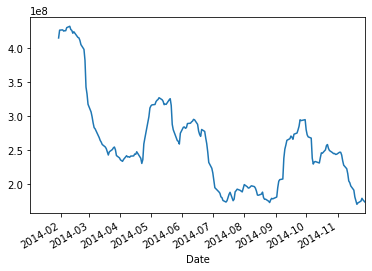

In [15]:
data.loc[(data.index>'2014-01-01') & (data.index<'2014-12-01')].Volume.rolling(20).mean().plot()

In [19]:
data = at.getDataExcel('AAPL')

# Funcion de ajuste de datos
data = at.ajustarOHLC(data)


data['pctChange'] = data.AdjClose.pct_change()
data['Price'] = data.AdjClose
data['Mov']=data.AdjClose.pct_change()*100
data['OpenGap']=(data.Open/data.Close.shift(1)-1)*100
data['IntraMov']=(data.Close/data.Open-1)*100
data.index.name = "Date"

data.dropna(inplace=True)
data

,Open,High,Low,Close,AdjClose,Volume,pctChange,Price,Mov,OpenGap,IntraMov
Date,,,,,,,,,,,
2000-03-07,3.919259,3.950256,3.754355,3.8086,3.8086,2437600,-0.022433,3.8086,-2.243326,0.597003,-2.823474
2000-03-08,3.808567,3.841734,3.674971,3.7816,3.7816,2421700,-0.007089,3.7816,-0.708922,-0.000863,-0.708065
2000-03-09,3.746624,3.874642,3.665411,3.7894,3.7894,2470700,0.002063,3.7894,0.206262,-0.924901,1.141723
2000-03-10,3.772051,3.965784,3.750663,3.8979,3.8979,2219700,0.028633,3.8979,2.863250,-0.457822,3.336346
2000-03-13,3.785307,3.921072,3.704096,3.7602,3.7602,2713900,-0.035327,3.7602,-3.532671,-2.888549,-0.663282
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-02,282.280000,301.440000,277.720000,298.8100,298.8100,85349339,0.093101,298.8100,9.310067,3.263096,5.855888
2020-03-03,303.670000,304.000000,285.800000,289.3200,289.3200,79868852,-0.031759,289.3200,-3.175931,1.626452,-4.725524
2020-03-04,296.440000,303.400000,293.130000,302.7400,302.7400,54794568,0.046385,302.7400,4.638463,2.460943,2.125219


<AxesSubplot:xlabel='Date'>

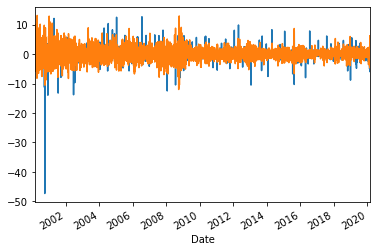

In [20]:
data.OpenGap.plot()
data.IntraMov.plot()


In [73]:
data.sort_values('OpenGap').head()

,Open,High,Low,Close,AdjClose,Volume,pctChange,Price,Mov,OpenGap,IntraMov
Date,,,,,,,,,,,
2000-09-29,1.747561,1.797775,1.572743,1.5963,1.5963,132529300,-0.518708,1.5963,-51.870835,-47.310247,-8.655552
2000-12-06,0.906937,0.929874,0.867883,0.8871,0.8871,24544000,-0.158269,0.8871,-15.826929,-13.944652,-2.187286
2002-06-19,1.076798,1.091056,1.046422,1.0613,1.0613,30526200,-0.150416,1.0613,-15.041627,-13.800996,-1.439263
2001-07-18,1.350276,1.412272,1.265961,1.2889,1.2889,20303800,-0.171658,1.2889,-17.165810,-13.221325,-4.545455
2008-01-23,16.885966,17.358361,15.639883,17.2433,17.2433,120463200,-0.106449,17.2433,-10.644902,-12.496615,2.116161


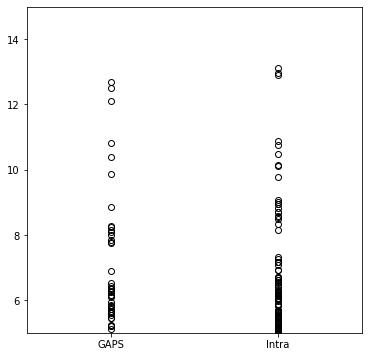

In [40]:
import matplotlib.pyplot as plt

series = [data.OpenGap,data.IntraMov]

fig, ax = plt.subplots(figsize=(6,6))

ax.boxplot(series, showmeans=True)
ax.set_ylim([5,15])

plt.xticks([1,2],["GAPS","Intra"])

plt.show()

# Graficos superpuestos

## Ejemplo con pandas directo

In [75]:
data = at.getDataExcel('AAPL')

# Funcion de ajuste de datos
data = at.ajustarOHLC(data)

data['pctChange'] = data.AdjClose.pct_change()
data['Price'] = data.AdjClose
data['Mov']=data.AdjClose.pct_change()*100
data['OpenGap']=(data.Open/data.Close.shift(1)-1)*100
data['IntraMov']=(data.Close/data.Open-1)*100
data.index.name = "Date"
data.dropna(inplace=True)

In [42]:
test = data.loc[:,['OpenGap','IntraMov']]
test = (test/100 +1).dropna()
test

,OpenGap,IntraMov
Date,,
2000-03-07,1.005970,0.971765
2000-03-08,0.999991,0.992919
2000-03-09,0.990751,1.011417
2000-03-10,0.995422,1.033363
2000-03-13,0.971115,0.993367
...,...,...
2020-03-02,1.032631,1.058559
2020-03-03,1.016265,0.952745
2020-03-04,1.024609,1.021252


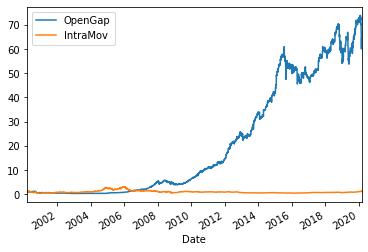

In [59]:
test = data.loc[:,['OpenGap','IntraMov']]
test = (test/100 +1).dropna()


test.cumprod().plot()
plt.show()

C:\Users\floda\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


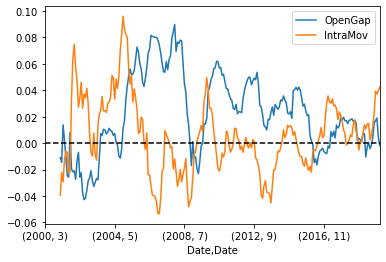

In [54]:
test = data.loc[:,['OpenGap','IntraMov']]
test = (test/100 +1).dropna()


tabla = test.groupby([test.index.year,test.index.month]).prod()-1
tabla.rolling(12).mean().plot()

plt.plot([0]*len(tabla), 'k--')

In [77]:
tabla

OpenGap  IntraMov
Date Date                    
2000 3    -0.090547  0.188097
     4    -0.100014  0.015000
     5     0.094731 -0.381513
     6     0.177246  0.059378
     7     0.081688 -0.103220
...             ...       ...
2019 11    0.010658  0.066154
     12    0.008912  0.089079
2020 1     0.000352  0.053639
     2    -0.168548  0.064797
     3     0.010479  0.046359

[241 rows x 2 columns]

In [78]:
tabla.abs().sum()

OpenGap     13.620235
IntraMov    16.595372
dtype: float64

## Ejemplo con matplotlib

In [60]:
import yfinance as yf
df = yf.download('GGAL')
df['variacion'] = df['Adj Close'].pct_change()
df['volatilidad'] = df['variacion'].rolling(250).std() * 250**0.5
df.dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume,variacion,volatilidad
Date,,,,,,,,
2001-07-23,11.92,11.98,11.11,11.24,10.71,1151900,0.027831,0.559277
2001-07-24,11.21,11.21,10.67,10.70,10.19,518800,-0.048553,0.561287
2001-07-25,10.50,10.69,10.23,10.55,10.05,1405300,-0.013739,0.561424
2001-07-26,10.36,10.45,10.15,10.27,9.78,741000,-0.026866,0.561974
2001-07-27,10.17,10.45,9.90,10.36,9.87,2540300,0.009202,0.561742
...,...,...,...,...,...,...,...,...
2020-08-27,10.10,10.16,9.83,9.90,9.90,585200,-0.013944,0.854634
2020-08-28,10.00,10.61,9.96,10.60,10.60,949300,0.070707,0.849162
2020-08-31,10.77,10.79,10.19,10.33,10.33,1591100,-0.025472,0.835619


## Escalas diferentes?

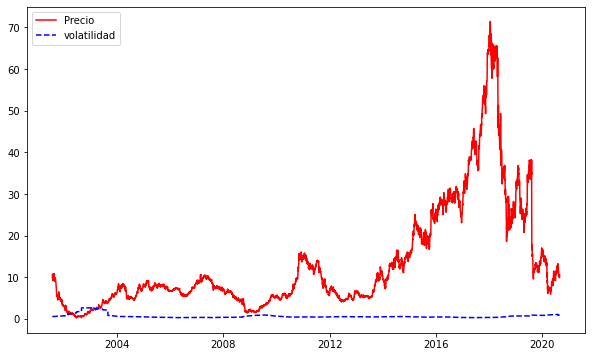

In [80]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'r-', label='Precio')
ax.plot(df['volatilidad'], 'b--', label='volatilidad')

plt.legend()
plt.show()

## Escalas diferentes

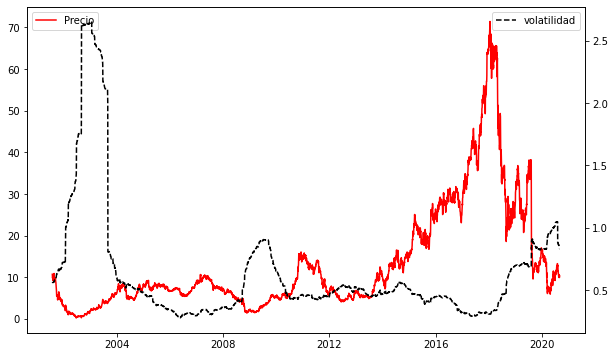

In [64]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'r-',  label='Precio')
ax.legend(loc='upper left')
#ax.set_yscale('log')

ax2 = ax.twinx()
ax2.plot(df['volatilidad'], 'k--',  label='volatilidad')
ax2.legend(loc='upper right')
#ax2.set_yscale('log')

ax2.legend()

plt.show()


## Escalas lineales y logaritmicas juntas

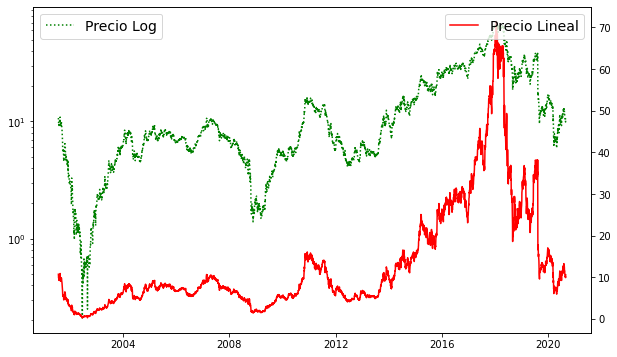

In [82]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'g:',label='Precio Log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=14)

ax2 = ax.twinx()
ax2.plot(df['Adj Close'], 'r-',label='Precio Lineal')
ax2.legend(loc='upper right', fontsize=14)

plt.show()

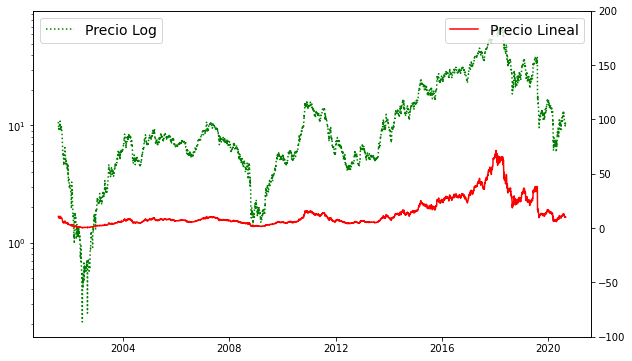

In [66]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'g:',label='Precio Log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=14)

ax2 = ax.twinx()
ax2.plot(df['Adj Close'], 'r-',label='Precio Lineal')

ax2.set_ylim(-100,200)
ax2.legend(loc='upper right', fontsize=14)

plt.show()

# Subplots

## Forma antigua

In [76]:
import analisis_tecnico as at

data = at.getDataExcel('AAPL')

# Funcion de ajuste de datos
data = at.ajustarOHLC(data)

data['pctChange'] = data.AdjClose.pct_change()
data['Price'] = data.AdjClose
data['Mov']=data.AdjClose.pct_change()*100
data['OpenGap']=(data.Open/data.Close.shift(1)-1)*100
data['IntraMov']=(data.Close/data.Open-1)*100
data.index.name = "Date"
data.dropna(inplace=True)

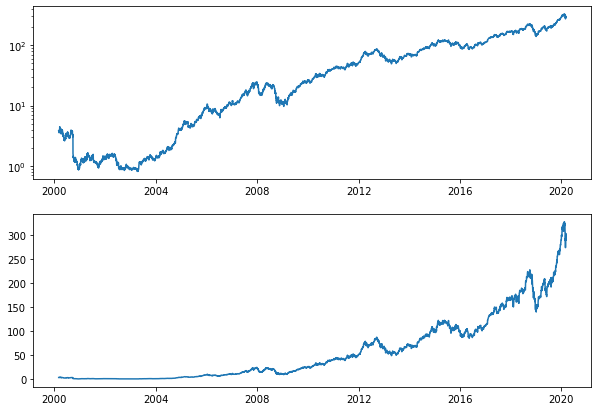

In [70]:
plt.figure(figsize=(10,7))

# asigno a la variable ax1 un subplot
# el 211 significa 2 filas, 1 columa, ocupar el 1° lugar
ax1 = plt.subplot(211)
ax1.plot(data.Price)
ax1.set_yscale('log')

# asigno a la variable ax2 otro subplot
# el 212 significa 2 filas, 1 columa, ocupar el 2° lugar
ax2 = plt.subplot(212)
ax2.plot(data.Price)
ax2.set_yscale('linear')

## Forma nueva

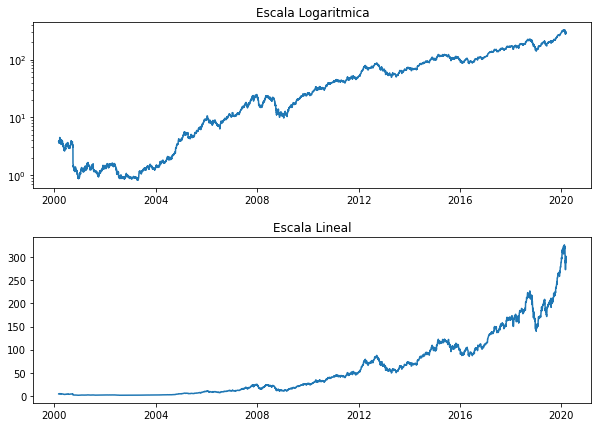

In [71]:
fig, axs = plt.subplots(2, figsize=(10,7))
axs[0].plot(data.Price)
axs[0].set_yscale('log')
axs[0].title.set_text('Escala Logaritmica')

axs[1].plot(data.Price)
axs[1].set_yscale('linear')
axs[1].title.set_text('Escala Lineal')
fig.subplots_adjust(hspace=0.3)

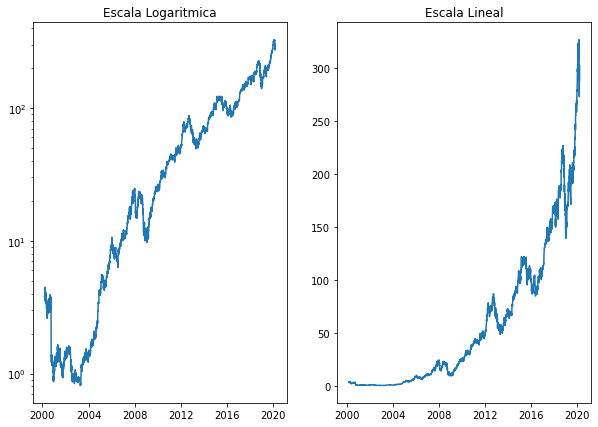

In [73]:
fig, axs = plt.subplots(figsize=(10,7), ncols=2)
axs[0].plot(data.Price)
axs[0].set_yscale('log')
axs[0].title.set_text('Escala Logaritmica')

axs[1].plot(data.Price)
axs[1].set_yscale('linear')
axs[1].title.set_text('Escala Lineal')
fig.subplots_adjust(hspace=0.3)

Les dejo exactamente lo mismo pero apilados horizontalmente, solo cambia la línea que define los subplots(filas, columnas) que en lugar de poner subplots(2) (que indica 2 filas) ponemos subplot(1,2) que indica una fila 2 columnas

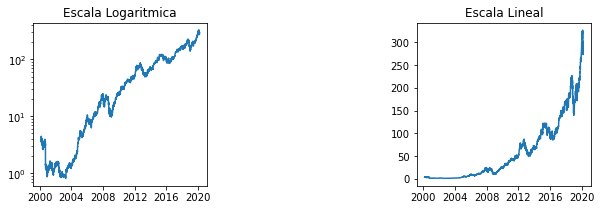

In [79]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
axs[0].plot(data.Price)
axs[0].set_yscale('log')
axs[0].title.set_text('Escala Logaritmica')
axs[1].plot(data.Price)
axs[1].set_yscale('linear')
axs[1].title.set_text('Escala Lineal')
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=1.2)

Les dejo como ejemplo un básico de precio y volumen

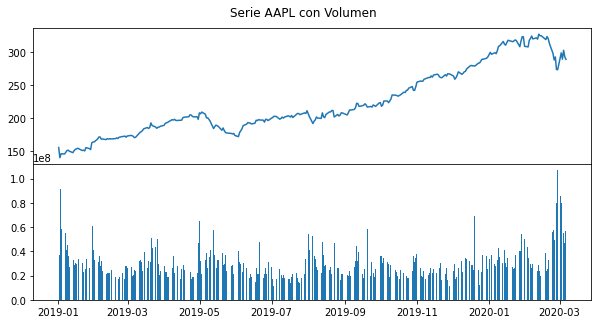

In [80]:
data = at.getDataExcel('AAPL')
precios2020 = data.loc[(data.index>='2019')]

fig, axs = plt.subplots(2, figsize=(10,5) )
fig.suptitle('Serie AAPL con Volumen', y= 0.94, color='black')

axs[0].plot(precios2020.index, precios2020.AdjClose)
axs[1].bar(precios2020.index, precios2020.Volume)
fig.subplots_adjust(hspace=0)

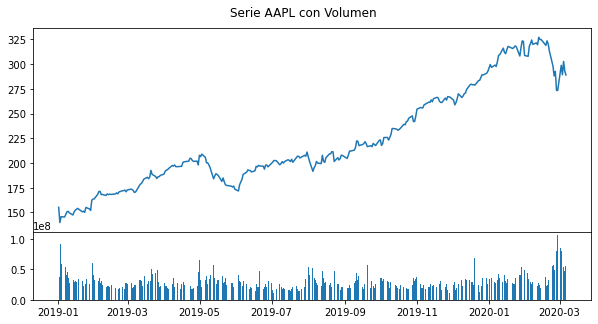

In [81]:
data = at.getDataExcel('AAPL')
precios2020 = data.loc[(data.index>='2019')]

fig, axs = plt.subplots(2, figsize=(10,5), gridspec_kw = {'height_ratios':[3, 1]} )
fig.suptitle('Serie AAPL con Volumen', y= 0.94, color='black')

axs[0].plot(precios2020.index, precios2020.AdjClose)
axs[1].bar(precios2020.index, precios2020.Volume)
fig.subplots_adjust(hspace=0)

# Estilos predeterminados

Hay varios estilos predeterminados de colores y tamaños, les dejo el comando para listarlos a todos, después vayan ustedes probando cual les gusta mas, el paquete de estilos se llama con es plt.style y pueden listarlos con plt.style.available o bien pueden seleccionar uno con plt.style.use("nombre_del_estilo_elegido")

In [82]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


A continuación dejo algunos ejemplos solo para mostrar que solo cambiando esa línea ya se puede elegir una variedad de estilos bastante diferenciados

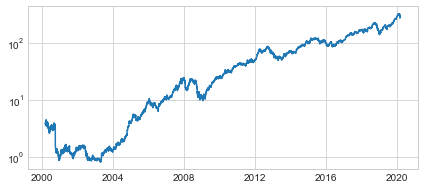

In [90]:
import pandas as pd
import analisis_tecnico as at
import matplotlib.pyplot as plt


data = at.getDataExcel('AAPL')
data = at.ajustarOHLC(data)
data = at.addGap(data)


plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,3))
plt.gca().set_yscale('log')
plt.plot(data.Price)

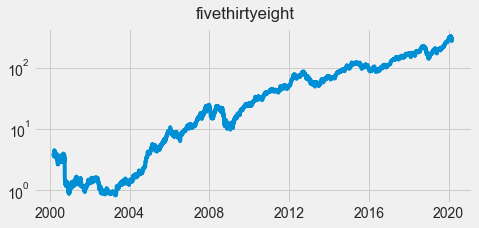

In [91]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(7,3)).suptitle('fivethirtyeight')
ax = plt.gca()

ax.set_yscale('log')
plt.plot(data.Price)

Supongamos que me encantó ese diseño pero no quiero que dibuje las grillas
<br>En ese caso hago la captura del objeto ejes y le aplico el método grid() y lo configuro como False

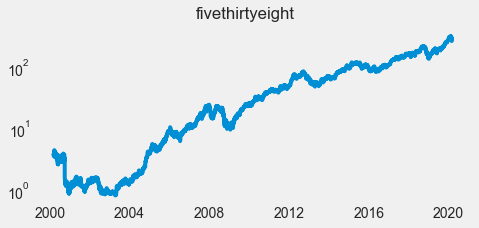

In [92]:

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,3)).suptitle('fivethirtyeight')

plt.gca().set_yscale('log')
plt.gca().grid(False)

plt.plot(data.Price)

Aplicamoos otro estilo, usemos el seaborn

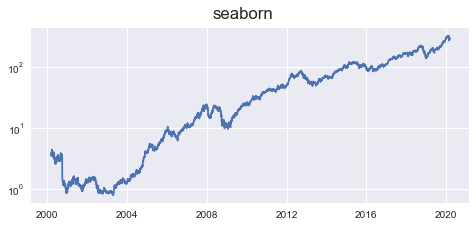

In [93]:
plt.style.use('seaborn')
plt.figure(figsize=(7,3)).suptitle('seaborn')
plt.gca().set_yscale('log')
plt.plot(data.Price)

Pero supongamos que me encantó ese estilo y no me gusto ese color de fondo de los ejes
<br>Entonces podemos aplicar el método set_facecolor("color") a los ejes que debemos capturar

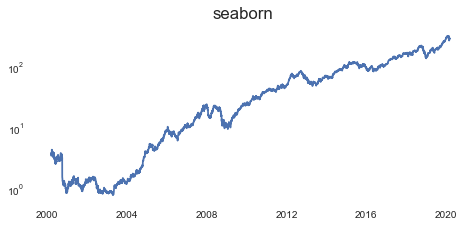

In [94]:
plt.style.use('seaborn')

plt.figure(figsize=(7,3)).suptitle('seaborn')
plt.gca().set_yscale('log')
plt.gca().set_facecolor("white")
plt.plot(data.Price)

### Gráficos con dos Ejes Y diferentes y el mismo eje X

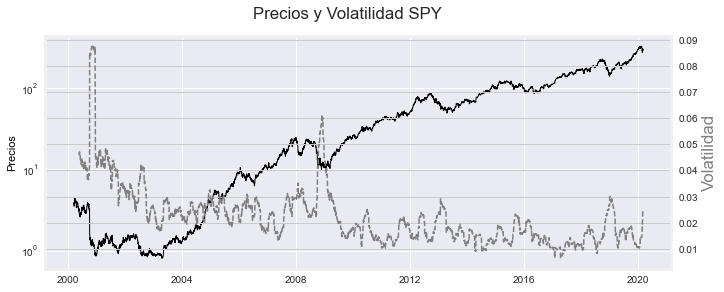

In [95]:
import pandas as pd
import analisis_tecnico as at
import matplotlib.pyplot as plt


data = at.getDataExcel('AAPL')
data = at.ajustarOHLC(data)
data = at.addGap(data)
data['STD'] = data.pctChange.rolling(50).std()

fig, ax1 = plt.subplots(figsize=(10,4))
plt.style.use('fivethirtyeight')

fig.suptitle('Precios y Volatilidad SPY')

ax1.set_ylabel('Precios', color="k")
ax1.set_yscale('log')
ax1.plot(data.Price, lw=1, color="k")

ax2 = ax1.twinx()  
ax2.set_ylabel('Volatilidad', color="gray")  
ax2.plot(data.STD, lw=1.5, linestyle="--", color="gray")

In [85]:
import yfinance as yf

data = yf.download('GGAL', auto_adjust='true', start='2020-01-01')

fast = 5
slow = 20

data['fast'] = data.Close.rolling(fast).mean()
data['slow'] = data.Close.rolling(slow).mean()
data['condicion'] = data.fast > data.slow

comprar = (data.condicion==True) & (data.condicion.shift()==False)
vender = (data.condicion==False) & (data.condicion.shift())

data['posicion'] = np.where(data.condicion==True, 'long','short')
data['accion'] = np.where(comprar, 'buy', np.where(vender, 'sell',''))
data = data.dropna().round(2)
data

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume,fast,slow,condicion,posicion,accion
Date,,,,,,,,,,
2020-01-30,14.26,14.85,14.11,14.84,508600,14.29,15.30,False,short,
2020-01-31,14.61,14.66,14.00,14.35,675200,14.36,15.19,False,short,
2020-02-03,14.50,15.38,14.47,15.19,963700,14.65,15.16,False,short,
2020-02-04,15.50,15.80,14.51,14.80,2161700,14.72,15.10,False,short,
2020-02-05,14.90,15.11,14.61,14.73,934000,14.78,15.05,False,short,
...,...,...,...,...,...,...,...,...,...,...
2020-08-27,10.10,10.16,9.83,9.90,585200,10.06,11.38,False,short,
2020-08-28,10.00,10.61,9.96,10.60,949300,10.15,11.31,False,short,
2020-08-31,10.77,10.79,10.19,10.33,1591100,10.21,11.16,False,short,


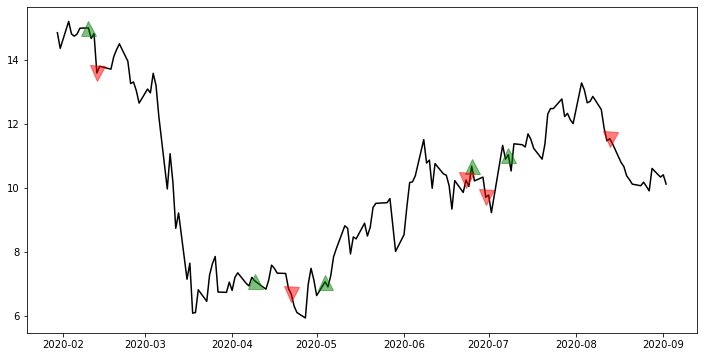

In [90]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data.Close, c='k', label='Precio')
ax.plot(data.loc[data.accion=='buy', 'Close'], marker='^', lw=0, c='g', markersize=15, alpha=0.5)
ax.plot(data.loc[data.accion=='sell', 'Close'], marker='v',lw=0, c='r', markersize=15, alpha=0.5)

plt.show()

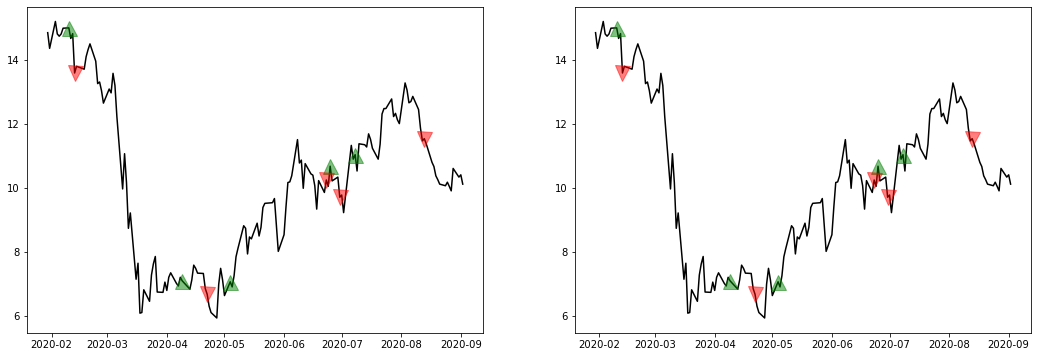

In [92]:
fig, ax = plt.subplots(figsize=(18,6), ncols=2)

for i in range(2):
    ax[i].plot(data.Close, c='k', label='Precio')
    ax[i].plot(data.loc[data.accion=='buy', 'Close'], marker='^', lw=0, c='g', markersize=15, alpha=0.5)
    ax[i].plot(data.loc[data.accion=='sell', 'Close'], marker='v',lw=0, c='r', markersize=15, alpha=0.5)

plt.show()

In [94]:
def prepararTablasTrades(data, fast=5, slow=20):
    data['fast'] = data.Close.rolling(fast).mean()
    data['slow'] = data.Close.rolling(slow).mean()
    data['condicion'] = data.fast > data.slow

    comprar = (data.condicion==True) & (data.condicion.shift()==False)
    vender = (data.condicion==False) & (data.condicion.shift())

    data['posicion'] = np.where(data.condicion==True, 'long','short')
    data['accion'] = np.where(comprar, 'buy', np.where(vender, 'sell',''))
    data = data.dropna().round(2)
    return data

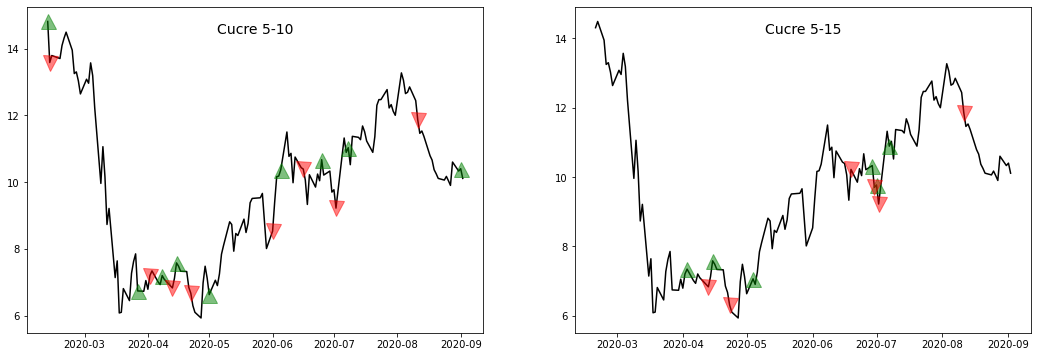

In [98]:
fig, ax = plt.subplots(figsize=(18,6), ncols=2)

medias_lentas = [10,15]

for i in range(len(medias_lentas)):
    df = prepararTablasTrades(data, 5, medias_lentas[i] )
    ax[i].plot(df.Close, c='k', label='Precio')
    ax[i].plot(df.loc[df.accion=='buy', 'Close'], marker='^', lw=0, c='g', markersize=15, alpha=0.5)
    ax[i].plot(df.loc[df.accion=='sell', 'Close'], marker='v',lw=0, c='r', markersize=15, alpha=0.5)
    ax[i].set_title(f'Cucre 5-{medias_lentas[i]}', y=0.9, fontsize=14)

plt.show()

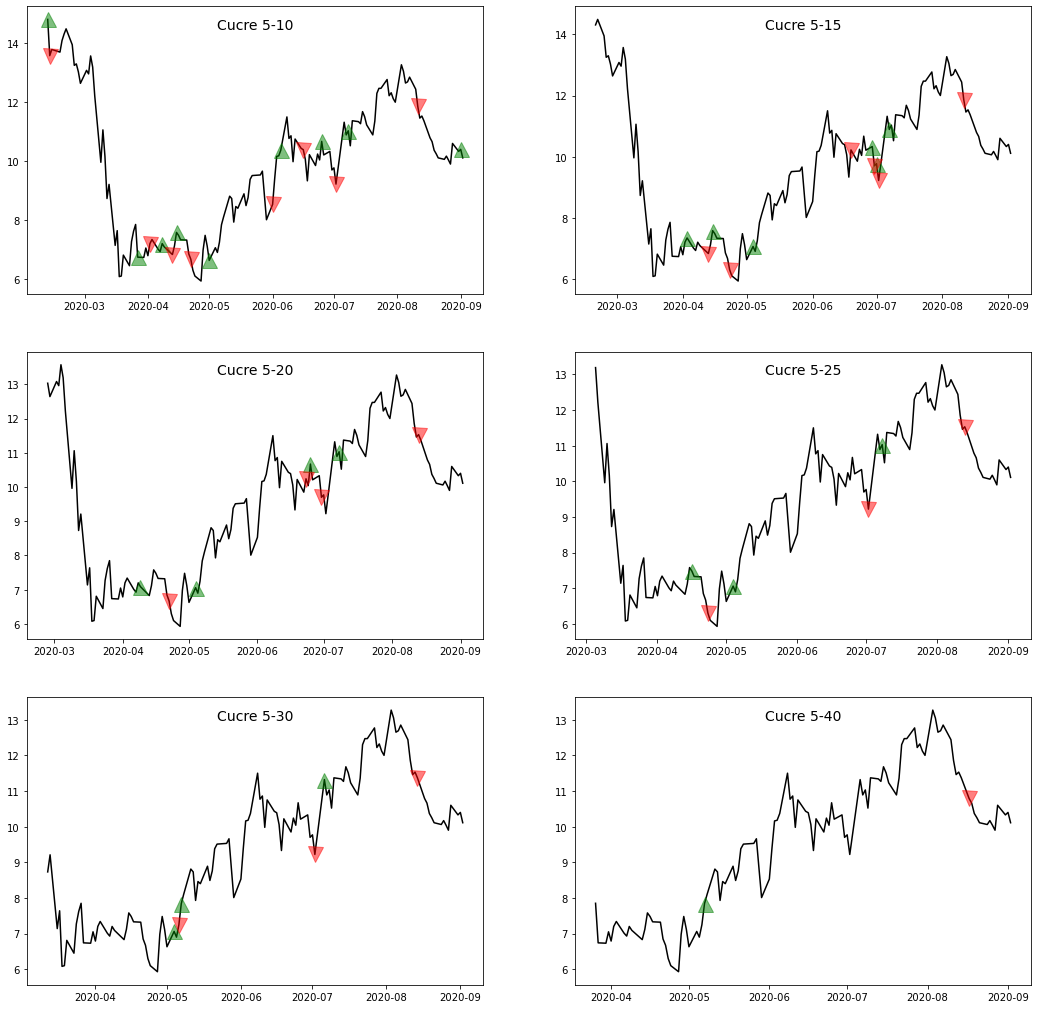

In [100]:
fig, ax = plt.subplots(figsize=(18,18), ncols=2, nrows=3)

medias_lentas = [10,15,20,25,30,40]

for i in range(len(medias_lentas)):
    col = i%2
    row = i//2
    df = prepararTablasTrades(data, 5, medias_lentas[i] )
    ax[row][col].plot(df.Close, c='k', label='Precio')
    ax[row][col].plot(df.loc[df.accion=='buy', 'Close'], marker='^', lw=0, c='g', markersize=15, alpha=0.5)
    ax[row][col].plot(df.loc[df.accion=='sell', 'Close'], marker='v',lw=0, c='r', markersize=15, alpha=0.5)
    ax[row][col].set_title(f'Cucre 5-{medias_lentas[i]}', y=0.9, fontsize=14)

plt.show()

In [103]:
def prepararTablasAño(año, fast=5, slow=20):
    start = str(año)+'-01-01'
    end = str(año)+'-12-31'
    
    data = yf.download('GGAL', auto_adjust='true', start=start, end=end)
    data['fast'] = data.Close.rolling(fast).mean()
    data['slow'] = data.Close.rolling(slow).mean()
    data['condicion'] = data.fast > data.slow

    comprar = (data.condicion==True) & (data.condicion.shift()==False)
    vender = (data.condicion==False) & (data.condicion.shift())

    data['posicion'] = np.where(data.condicion==True, 'long','short')
    data['accion'] = np.where(comprar, 'buy', np.where(vender, 'sell',''))
    data = data.dropna().round(2)
    return data

In [116]:
comm_var = [0.02,0.03,0.01,0,0.1]
comm_var2 = [0.02,0.03,-0.01,0,-0.01]

            
v1 = np.array(comm_var).mean()
v2 = np.array(comm_var2).mean()

variaciones = np.array([v1,v2])
variaciones

inicio = 100

factores = variaciones+1
serie = factores.cumprod() * inicio
serie

array([103.2   , 103.8192])

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


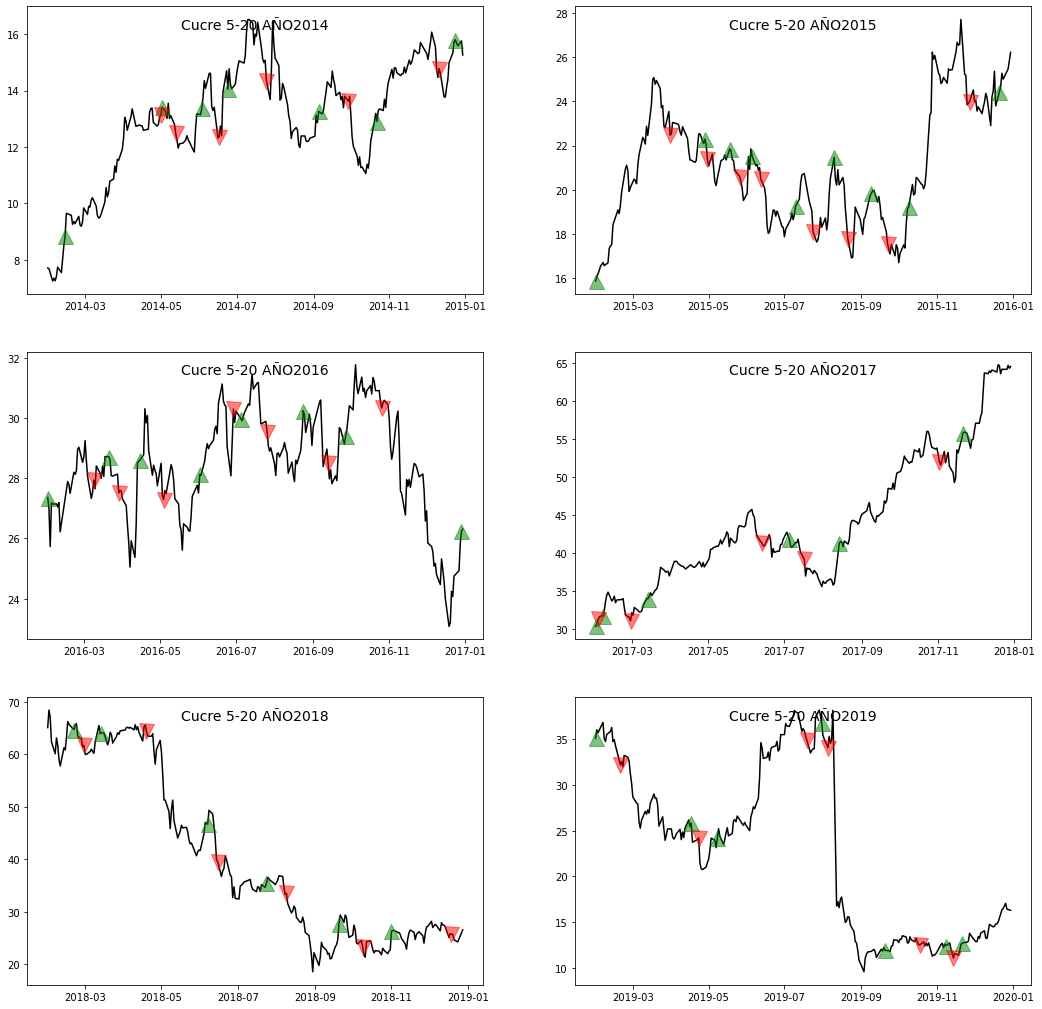

In [105]:
fig, ax = plt.subplots(figsize=(18,18), ncols=2, nrows=3)

medias_lentas = [10,15,20,25,30,40]
años = [2014, 2015, 2016, 2017,2018, 2019]

for i in range(len(años)):
    col = i%2
    row = i//2
    df = prepararTablasAño(años[i], 5,20 )
    ax[row][col].plot(df.Close, c='k', label='Precio')
    ax[row][col].plot(df.loc[df.accion=='buy', 'Close'], marker='^', lw=0, c='g', markersize=15, alpha=0.5)
    ax[row][col].plot(df.loc[df.accion=='sell', 'Close'], marker='v',lw=0, c='r', markersize=15, alpha=0.5)
    ax[row][col].set_title(f'Cucre 5-20 AÑO{años[i]}', y=0.9, fontsize=14)

plt.show()

# Contenidos de un backtest

* PreBackTest
    * Análisis de correlación
    * Trades con una determinada parametrizacion en un determinado activo
    * Tabla de resultados o reporting básico
        * % de trades positivos y negativos
        * Esperanza matemática del método
        * Tiempo comprado / libre
        
        
* Backtest básico
    * Trades en un grupo de activos, en un rango de parametros
    * Tabla de resultados intermedia
        * Resultados año a año
        * Comparación con el buy&Hold
        * Comparación con el banchmark
        * Ratios de riesgo (Sharpe, Sortino, etc)
        
        
* Análisis de sensibilidad
    * Parametrización de variables
    * Cambio de indicadores/ideas como grupo de control
    
    
* Backtest Avanzado
    * Manejo de posición/riesgo, exposición óptima (Kelly, Montecarlo etc)
    * Riesgo de overfiting
    * Factibilidad técnica (volúmenes, liquidez, spreads, fallas, tiempos etc)

    
* Análisis de portabilidad
    * Cruce y armado de matrices de resultados
    * Matrices de correlacion cross mkt
    * Matrices de correlacion cross time-frame
    * Clusterizacion por régimenes (volatilidad, épocas, ciclos etc)

<img src='imagenes/backtest.png'>